# **Predicting Heart Disease using Machine Learning Algorithms & Neural Networks**

## ***Content***

##### A. Import Dependencies and Data
##### B. Data Wrangling
##### C. Exploratory Data Analysis
##### D. Predictive Analytics using Machine Learning
##### E. Conclusions

### **Goal**

-To predict whether a patient should be diagnosed with Heart Disease. This is a binary outcome. 
    Positive (+) = 1, patient diagnosed with Heart Disease  
    Negative (-) = 0, patient not diagnosed with Heart Disease 

-To experiment with various Classification Models & see which yields  greatest accuracy. 
    - Examine trends & correlations within our data
    - determine which features are important in determing Positive/Negative Heart Disease

### **Features**

Our Predictor (Y, Positive or Negative diagnosis of Heart Disease) is determined by 13 features (X):

1. **age:** Important factor since with increase in age risk increases.
2. **sex :** 1= Male, 0= Female (Binary) Male and Female have different risk profile hence sex                   classification
3. **(cp)chest pain type (4 values -Ordinal):** Value 1: typical angina ,Value 2: atypical angina,                                                  Value 3: non-anginal pain , Value 4: asymptomatic 
4. **(trestbps) resting blood pressure:** High resting blood sugar is a risk factor for heart                                                 disease
5. **(chol) serum cholestoral in mg/dl:** High levels of cholestrol such as LDL indicates high                                                chances of risk.
6. **(fbs)fasting blood sugar > 120 mg/dl:** (1 = true; 0 = false) High Fbs generally indicates                                                   high risk of heart disease.
7. **(restecg) resting electrocardiographic results:** (values 0 = normal,1 = abnormal ST                                                                   depression, 2 = signs of LVH ) Abnormal ECG                                                         reads at rest can indicate heart problems
8. **(thalach) maximum heart rate achieved:** Lower maximum heart rates achieved during exercise                                                  are associated with higher risk of heart disease,                                                   reflecting the heart's inability to cope with                                                       physical stress.
9. **(exang) exercise induced angina:** (1 = yes; 0 = no) The presence of exercise-induced angina                                           indicates that the heart is not getting enough oxygen                                               during physical exertion, a strong indicator of coronary                                            artery disease. 
10. **(oldpeak) = ST depression induced by exercise relative to rest:**  ST depression on an ECG                                                                             during exercise is a                                                                                marker of ischemia, which                                                                           is a strong indicator of                                                                            underlying coronary artery                                                                          disease.
11. **(slope) of the peak exercise ST segment (Ordinal):** (Value 1: upsloping , Value 2: flat ,                                                                Value 3: downsloping)The slope of the                                                               ST segment during exercise can indicate                                                             the severity of ischemia and heart                                                                  disease. It typically is considered as                                                              part of stress test results.
12. **(ca) number of major vessels (0-3, Ordinal) colored by fluoroscopy:**  This measures the                                                                                   number of major                                                                                     vessels that are                                                                                    narrowed or blocked.                                                                                Higher values                                                                                       typically indicate                                                                                  more severe heart                                                                                   disease.
13. **(thal) maximum heart rate achieved - (Ordinal): 1 = normal; 2 = fixed defect; 3 = reversable defect:** This refers to a blood disorder involving less than normal amounts of an oxygen-carrying            protein. In the context of heart disease prediction, it can also refer to thallium stress           test results used to diagnose coronary artery disease.

## ***A. Importing Dependencies & Data***

##### ***--->Import Dependencies***

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve

##### ***--->Import Data***

In [2]:
file_path = r"C:\Users\zeelt\Desktop\Python Projects\Major Project\Dataset\DIsease_Dataset.csv"
data = pd.read_csv(file_path)
type(data)

pandas.core.frame.DataFrame

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## ***B. Data Wrangling***

In [4]:
shape = data.shape
print("Rows:Columns : ",shape)

Rows:Columns :  (303, 14)


In [5]:
# All the columns
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
# Number of unique values for each variable
data.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [7]:
# Statistical Measures for dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#Identify count of null values in the dataset
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Calculate distribution of data
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

## ***C. Exploratory Data Analysis***

### Analysing The Target Variable

target
1    165
0    138
Name: count, dtype: int64


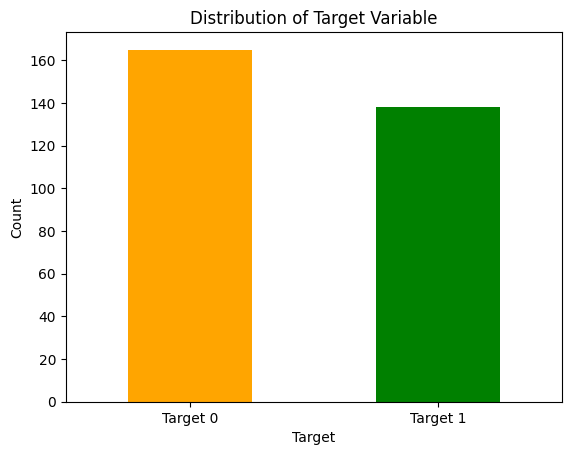

In [10]:
# Count the occurrences of each unique value in the target variable
target_count = data.target.value_counts()

# Print the count of each unique value in the target variable
print(target_count)

colors = ['orange','green']
target_count.plot(kind='bar',color=colors)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.xticks([0, 1], ['Target 0', 'Target 1'], rotation=0)
plt.show()


#### Filter Data By Positive and Negative Targets

##### ---> Filter by Positive Target

In [11]:
# Filtering data by positive Heart Disease patient 
pos_data = data[data['target']==1]
pos_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [12]:
pos_data['target'].count()

165

##### ---> Filter by Negative Target

In [13]:
# Filtering data by positive Heart Disease patient 
neg_data = data[data['target']==0]
neg_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
neg_data['target'].count()

138

### Analysing The Target Variable

##### ---> Analyse Sex Feature

In [15]:
data["sex"].unique()

array([1, 0], dtype=int64)

C:\Users\zeelt\AppData\Local\Temp\ipykernel_20836\1494672859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["sex"], y=data["target"], palette=colors)


<Axes: xlabel='sex', ylabel='target'>

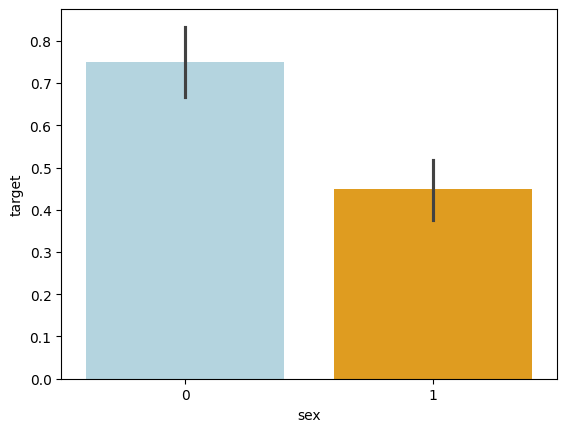

In [16]:
colors = ['lightblue', 'orange']
sns.barplot(x=data["sex"], y=data["target"], palette=colors)

**Observation:** We can observe that there are comparitively more female targets than male targets

##### ---> Analyse Chest Pain Type Feature

In [17]:
data["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

C:\Users\zeelt\AppData\Local\Temp\ipykernel_20836\2930415594.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["cp"],y=data["target"],palette=colors)


<Axes: xlabel='cp', ylabel='target'>

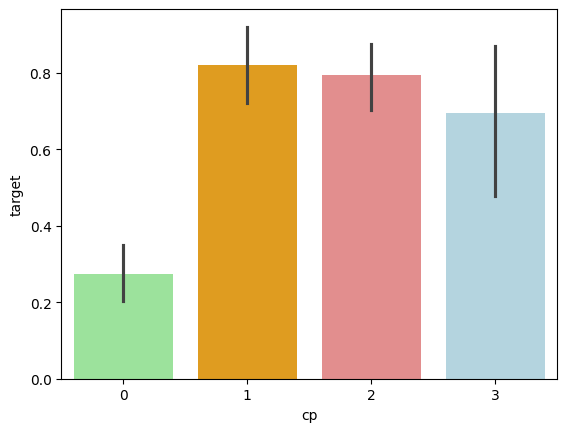

In [18]:
colors = ['lightgreen','orange','lightcoral','lightblue']
sns.barplot(x=data["cp"],y=data["target"],palette=colors)

**Observation:** We can observe that patients with CP value 0 are least likely to have heart problems where the paitients with CP value 1 are most likely the patients to have heart problems 

##### ---> Analyse FBS Feature

In [19]:
data["fbs"].unique()

array([1, 0], dtype=int64)

C:\Users\zeelt\AppData\Local\Temp\ipykernel_20836\2572492006.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["fbs"],y=data["target"], palette=colors)


<Axes: xlabel='fbs', ylabel='target'>

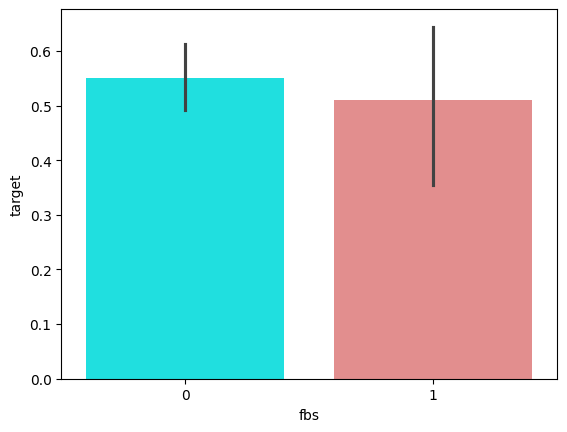

In [20]:
colors = ['cyan','lightcoral']
sns.barplot(x=data["fbs"],y=data["target"], palette=colors)

**Observation:** No distinguishing observation

##### ---> Analyse Restecg Feature

In [21]:
data["restecg"].unique()

array([0, 1, 2], dtype=int64)

C:\Users\zeelt\AppData\Local\Temp\ipykernel_20836\2469303321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["restecg"],y=data["target"], palette=colors)


<Axes: xlabel='restecg', ylabel='target'>

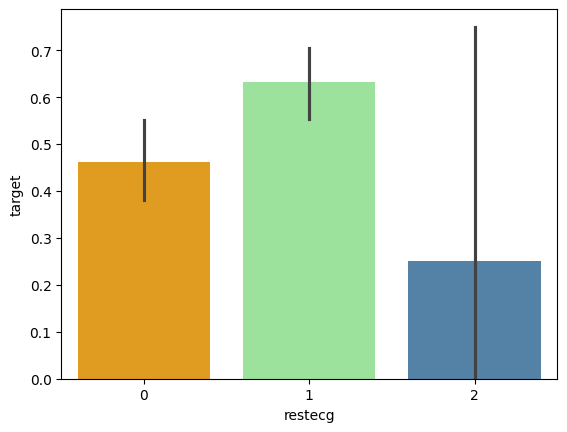

In [22]:
colors = ['orange','lightgreen','steelblue']
sns.barplot(x=data["restecg"],y=data["target"], palette=colors)

**Observation:** Patients having restecg values 1 and 0 are more likely to have heart problems as compared to those having restecg values 2.

##### ---> Analyse Exang Feature

In [23]:
data["exang"].unique()

array([0, 1], dtype=int64)

C:\Users\zeelt\AppData\Local\Temp\ipykernel_20836\107901569.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["exang"],y=data["target"], palette=colors)


<Axes: xlabel='exang', ylabel='target'>

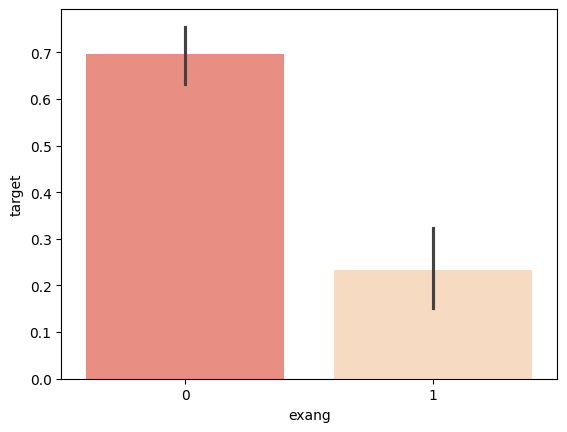

In [24]:
colors = ['salmon','peachpuff']
sns.barplot(x=data["exang"],y=data["target"], palette=colors)

**Observation:** Patients having exang values 1 are less likely to have heart problems as compared to those having exang value 0

##### ---> Analyse Slope Feature

In [25]:
data["slope"].unique()

array([0, 2, 1], dtype=int64)

C:\Users\zeelt\AppData\Local\Temp\ipykernel_20836\2095465021.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["slope"],y=data["target"], palette=colors)


<Axes: xlabel='slope', ylabel='target'>

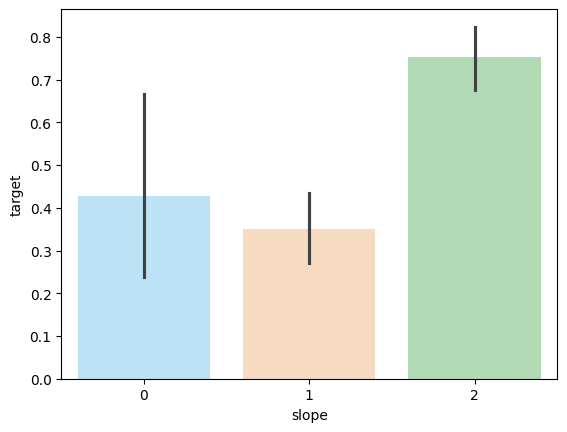

In [26]:
colors = [(0.7, 0.9, 1.0),'peachpuff',(0.67, 0.88, 0.69)]
sns.barplot(x=data["slope"],y=data["target"], palette=colors)

**Observation:** Patients having slope value 2 are more likely to have heart problems as compared to those having slope values 1 and 0.

##### ---> Analyse Ca Feature

In [27]:
data["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64


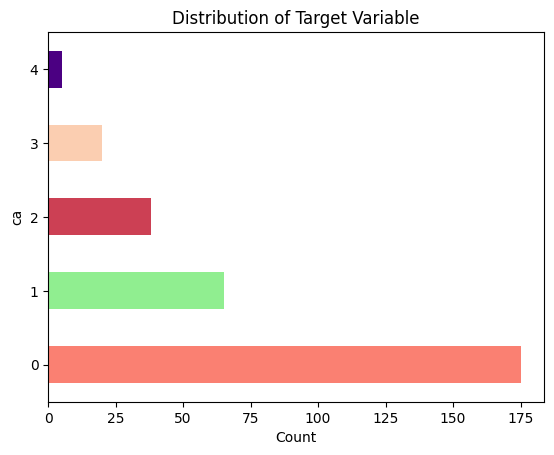

In [28]:
ca_count = data.ca.value_counts()

print(ca_count)

colors = ['salmon','lightgreen',(0.8, 0.25, 0.33),(251/255, 206/255, 177/255) ,'indigo']
ca_count.plot(kind='barh',color=colors)
plt.xlabel('Count')
plt.ylabel('ca')
plt.title('Distribution of Target Variable')
plt.yticks([0, 1, 2, 3, 4], rotation=0)
plt.show()

C:\Users\zeelt\AppData\Local\Temp\ipykernel_20836\3439032891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["ca"],y=data["target"], palette=colors)


<Axes: xlabel='ca', ylabel='target'>

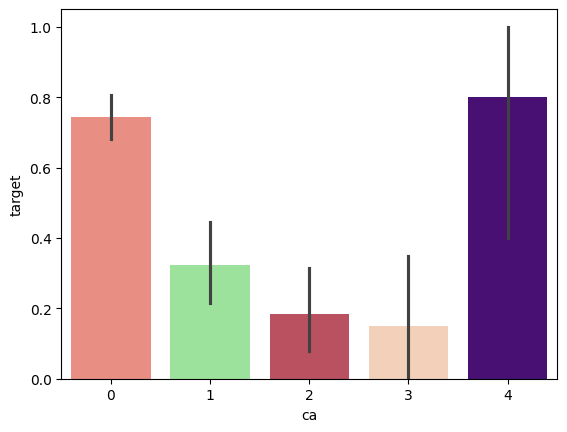

In [29]:
colors = ['salmon','lightgreen',(0.8, 0.25, 0.33),(251/255, 206/255, 177/255) ,'indigo']
sns.barplot(x=data["ca"],y=data["target"], palette=colors)

**Observation:** Although the value count of patients having ca value 4 is low, but they are the patients with highest possibility of having heart disease. The second most patients who have a possibility of having heart disease would be those having ca value 0.

##### ---> Analyse Thal Feature

In [30]:
data["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

C:\Users\zeelt\AppData\Local\Temp\ipykernel_20836\1959056423.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["thal"],y=data["target"], palette=['red','lightgreen','lightblue','orange'])


<Axes: xlabel='thal', ylabel='target'>

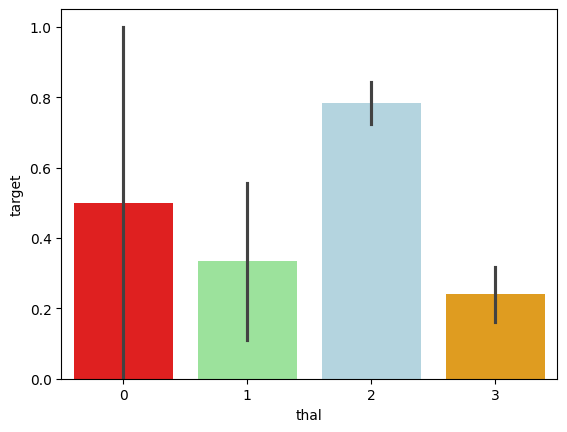

In [31]:
sns.barplot(x=data["thal"],y=data["target"], palette=['red','lightgreen','lightblue','orange'])

**Observation:** Patients having thal value 2 are more likely to have heart problems as compared to those having slope values 0, 1 and 3.

### Identify Correlations

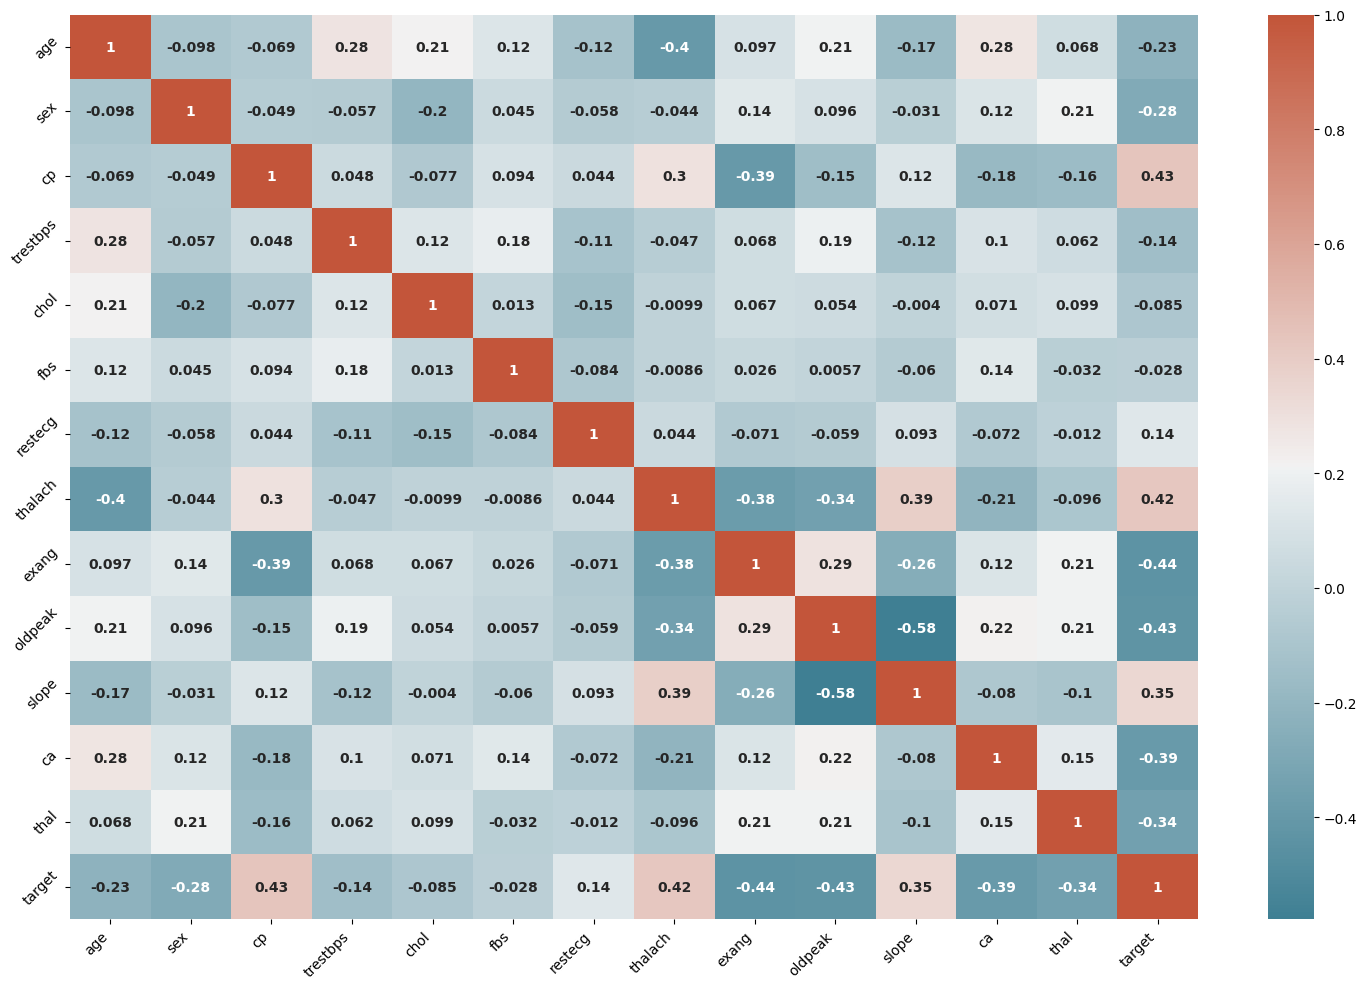

In [32]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, 
            xticklabels=corr.columns, # x-axis labels
            yticklabels=corr.columns, # y-axis labels
            annot=True, # Values inside the boxes of matrix
            annot_kws={"weight": "bold"}, # Make the annotation bold
            cmap=sns.diverging_palette(220, 20, as_cmap=True)) # Create a multicolored visualization for the matrix
plt.xticks(rotation=45, ha='right') # rotate the x axis labels to an angle of 45 degree
plt.yticks(rotation=45) # rotate the y axis labels to an angle of 45 degree
plt.tight_layout()
plt.show()

In [33]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


Based on the correlation matrix we can see that chest pain and target has the most positive correlation coeffecient value. This means that people having the chest pain are more likely to have heart related disease. We can also see that thalac which is maximum heart rate achieved also indicates that the possibility of having heart disease is high.

In addition we can see that we have a negative coorelation between exercise induced angina and our target. 

##### ***--->Create Pairplot***

The idea is to create pairplots to identify and see correlations between variables more distinguishingly. To clearly identify correlations between continous columns from data we make pairplots between only the columns such as age, trestbps, chol, etc. 

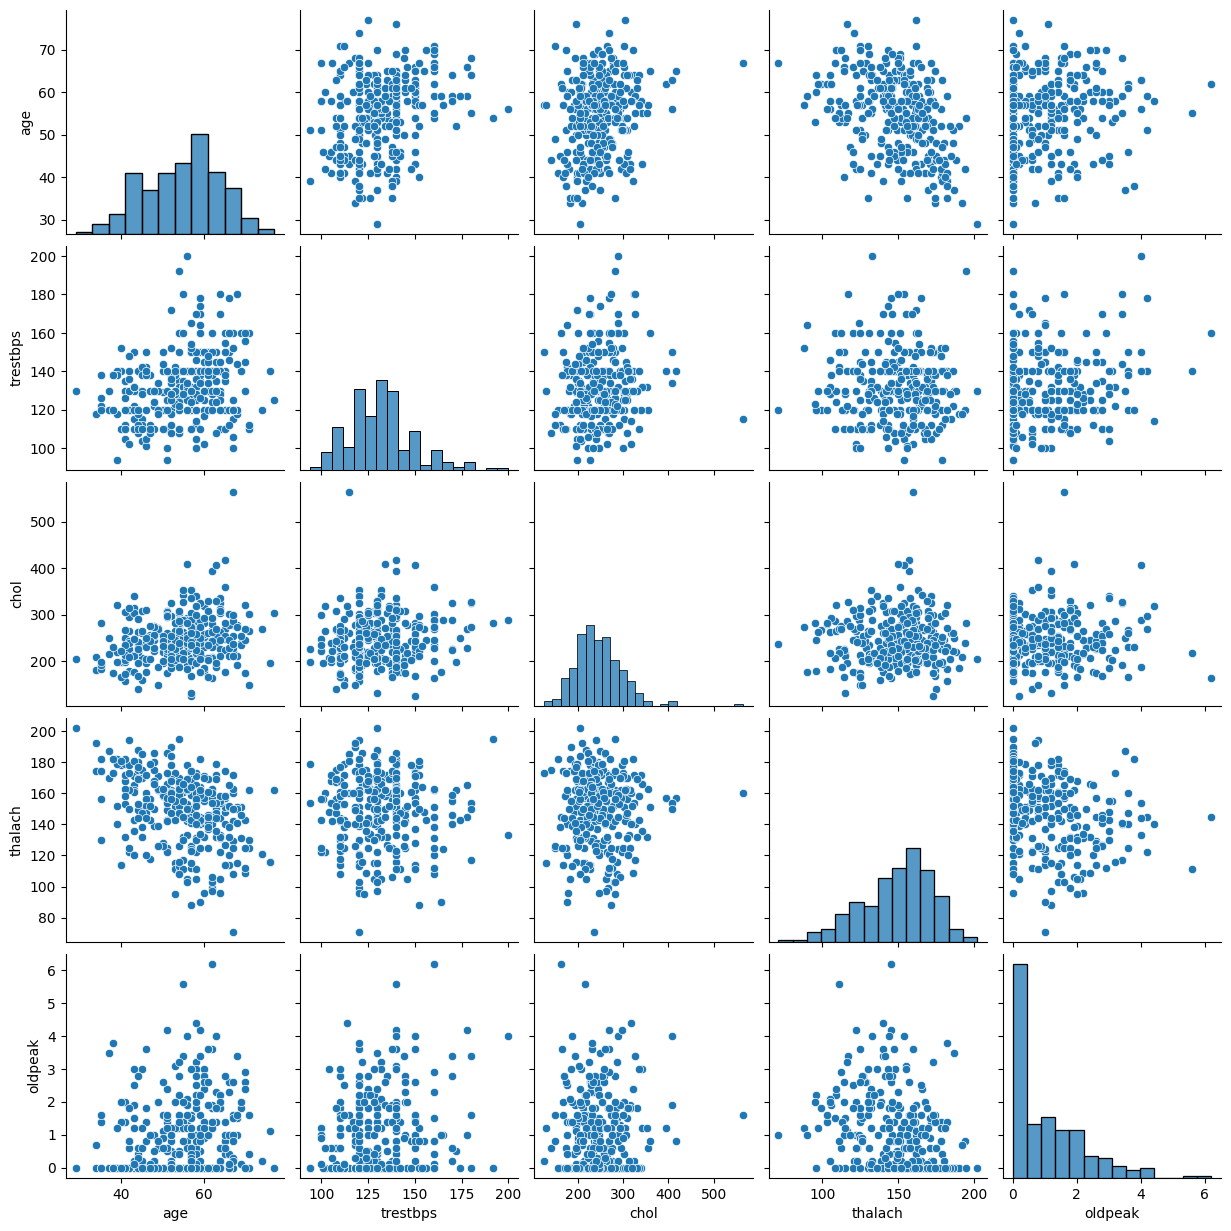

In [34]:
subdata = data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
sns.pairplot(subdata)

### ST depression

ST depression is a key indicator in diagnosing and assessing the severity of heart disease. It is a finding on the ECG that appears as a downward deflection of the of the ST segment which is the flat section of ECG trace. 

Myocardial Ischemia is a condition where there is insufficient blood flow to the heart muscle due a partial or complete blockage of the coronary arteries, which leads to lack of oxygen in the heart and improper functioning. Various slopes of ST depression indicate the type of risk associated that is associated to a particular person's heart.

Slope 0: Upsloping of the ST segment generally is seen when individuals show signs of having a healthy heart functioning

Slope 1: Flat ST segments indicate that functioning of heart is improper and indicates existence of myocardial ischemia.

Slope 2: Downward ST segment firmly indicates that there is higher risk of heart disease and strong indication of ischemia. 

Text(36.804208333333335, 0.5, 'ST depression')

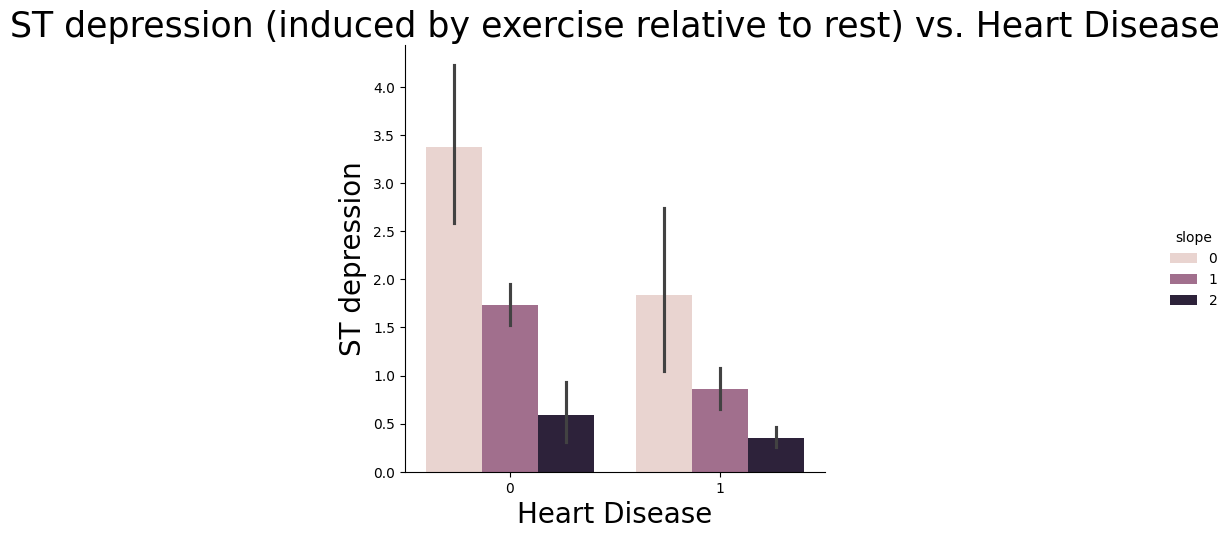

In [35]:
sns.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=data);

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

***Observation**: The equal distribution of slopes (0,1,2) among heart disease patients and healthy individuals suggest that while slope can provide significant information but it alone is not enough to justify the existence of heart disease and risk asssessment.*

### Create Violin and Box Plots

Violin and Box Plots are tools for visualizing the distribution of data and provide insights into details such as Median, Inter Quartile Ranges, Outliers, Density Estimation, and the distribution of data. 


**Violin Plots:**
1. Density: The width of plot shows where data points are concentrated
2. Central Tendency: Shows the median and quartiles
3. Distribution Shape: The shape of the density plot shows overall distribution of data

**Box Plots:**
1. Central Tendency: The median for each category
2. Spread: The Interquartile range for each category
3. Outliers: Shows outlier points outside the whiskers
4. Symmetry: Position of Median and Whisker lengths


Text(0, 0.5, 'Thalach Level')

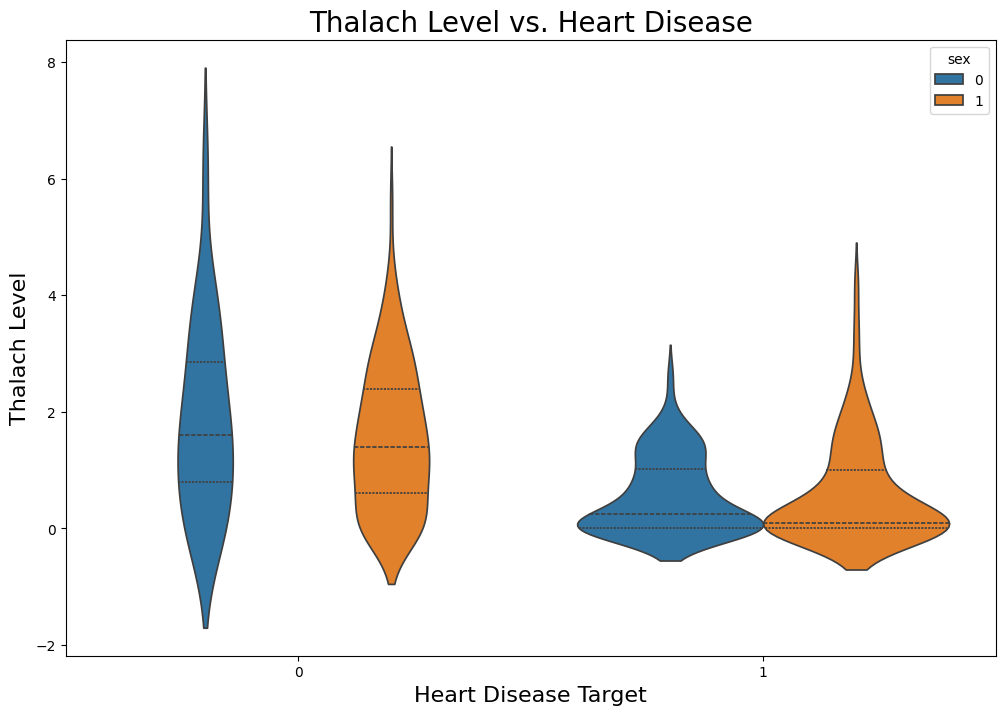

In [36]:
plt.figure(figsize=(12,8))
sns.violinplot(x= 'target', y= 'oldpeak',hue="sex", inner='quartile',data= data )
plt.title("Thalach Level vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Thalach Level", fontsize=16)

We can observe that patients that are positive targets (HDT = 1), they show a lower median for ST depression. The distribution of data for them is greater between Thalac levels 0 - 1.5. Having more compressed distribution of Thalac Levels, indicate narrow range of maximum heart rates, thus greater susceptibility to heart disease.

Meanwhile we can observe that for negative targets (HDT = 0), they show a normal ST depression. The distribution of data for them is greater between Thalac levels 1.5 to 2.5. 

In addition there aren't many differences between different sexes. 

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

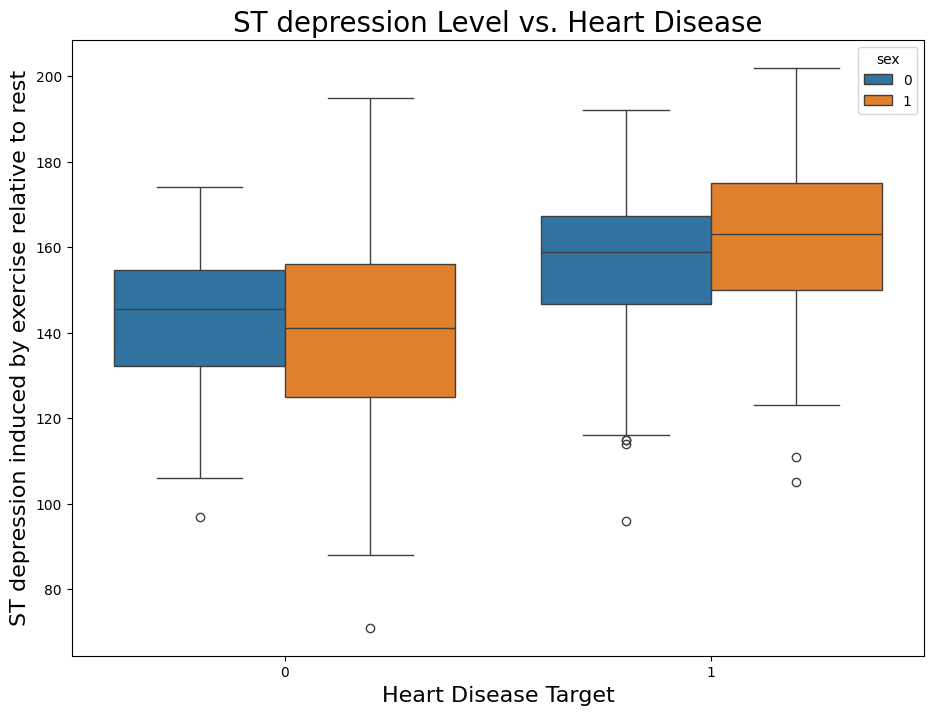

In [37]:
plt.figure(figsize=(11,8))
sns.boxplot(x= 'target', y= 'thalach',hue="sex", data=data )
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)

Positive patients exhibit a hightened median for ST depression level, while negative patients have lower levels. In addition, we dont see many differences between male & female target outcomes, expect for the fact that males have slightly larger ranges of ST Depression.

##### ---> ST depression and Thalach Differences

In [38]:
print("Positive patients ST depression: " + str(pos_data['oldpeak'].mean()))
print("Negative patients ST depression: " + str(neg_data['oldpeak'].mean()))

Positive patients ST depression: 0.583030303030303
Negative patients ST depression: 1.5855072463768116


In [39]:
print("Positive patients Thalach: " + str(pos_data['thalach'].mean()))
print("Negative patients Thalach: " + str(neg_data['thalach'].mean()))

Positive patients Thalach: 158.46666666666667
Negative patients Thalach: 139.1014492753623


**Observation:**
We can see that although the mean ST depression for Negative Target patients is high as compared to ST depression of Positive Target patients the average Thalach (maximum heart rate achieved) value of Positive Target Patients is greater as compared to that of Negative Target Patients

## ***D. Machine Learning & Predictive Analytics***

#### **a. Prepare Data for Model**

##### ***---> Assigning 13 features to X and the last column of our dataset to the classification predictor Y.***

In [40]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

##### ***---> Splitting the dataset into Training and Test split using sklearn***

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

##### ---> ***Standardization***:

Preprocessing technique used to transform features of dataset such that they have the properties of a standard normal distribution. This means that transformed data will have a mean of 0, and a standard deviation of 1. 

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train) # Fit: calculates the mean and standard deviation of data Transform: 
x_test = sc.transform(x_test)

#### **b. Model Training**

###### We will now **Train** various classification models on the training dataset and see which model yields the highest accuracy. We will then compare the accuracy of Logistic Regression, K-NN, SVM, and other Algorithms. 

## *Model 1: Logistic Regression*

In [43]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



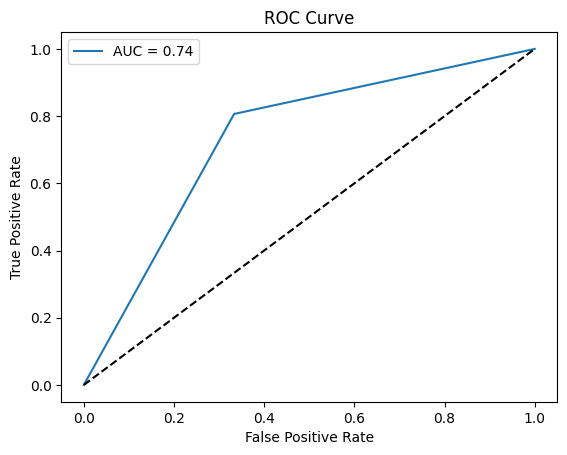

In [44]:
def plot_roc_curve(y_test, y_pred1):
    fpr, tpr, _ = roc_curve(y_test, y_pred1)
    auc = roc_auc_score(y_test, y_pred1)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

plot_roc_curve(y_test, y_pred1)

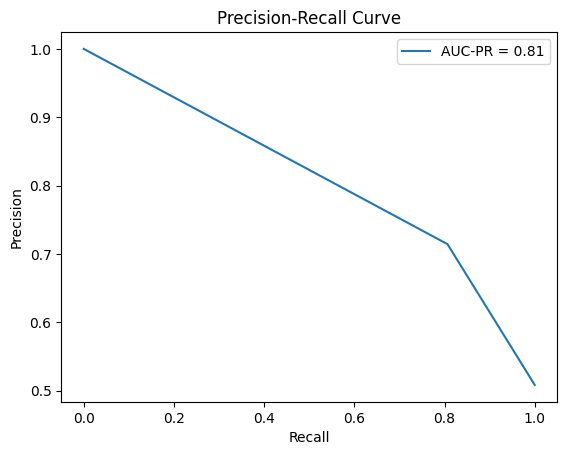

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

def plot_precision_recall_curve(y_test, y_pred1):
    precision, recall, _ = precision_recall_curve(y_test, y_pred1)
    pr_auc = auc(recall, precision)  # Calculate AUC-PR
    plt.plot(recall, precision, label=f'AUC-PR = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')  # Add legend with AUC-PR value
    plt.show()

plot_precision_recall_curve(y_test, y_pred1)

## *Model 2: K-Nearest Neighbours (KNN)*

In [46]:
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



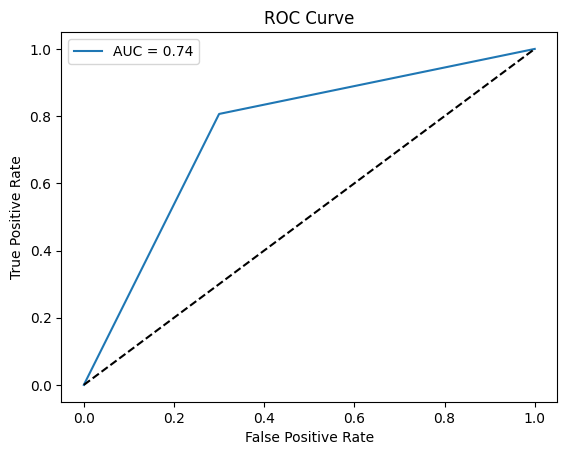

In [47]:
def plot_roc_curve(y_test, y_pred2):
    fpr, tpr, _ = roc_curve(y_test, y_pred2)
    auc = roc_auc_score(y_test, y_pred1)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

plot_roc_curve(y_test, y_pred2)

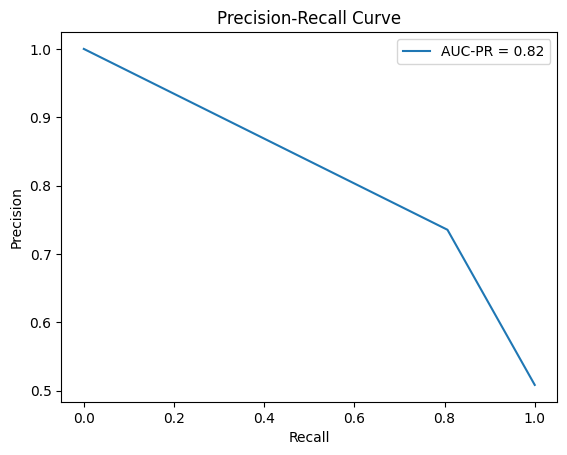

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

def plot_precision_recall_curve(y_test, y_pred2):
    precision, recall, _ = precision_recall_curve(y_test, y_pred2)
    pr_auc = auc(recall, precision)  # Calculate AUC-PR
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend([f'AUC-PR = {pr_auc:.2f}'], loc='best')  # Add legend with AUC-PR value
    plt.show()

plot_precision_recall_curve(y_test, y_pred2)

## *Model 3: Support Vector Machine (SVM)*

In [49]:
from sklearn.metrics import classification_report 
from sklearn.svm import SVC

model3 = SVC(random_state=1) # get instance of model
model3.fit(x_train, y_train) # Train/Fit model 

y_pred3 = model3.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred3)) # output accuracy

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



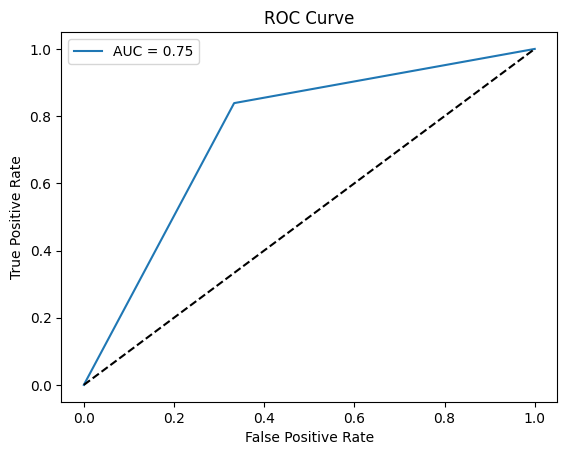

In [50]:
def plot_roc_curve(y_test, y_pred3):
    fpr, tpr, _ = roc_curve(y_test, y_pred3)
    auc = roc_auc_score(y_test, y_pred3)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

plot_roc_curve(y_test, y_pred3)

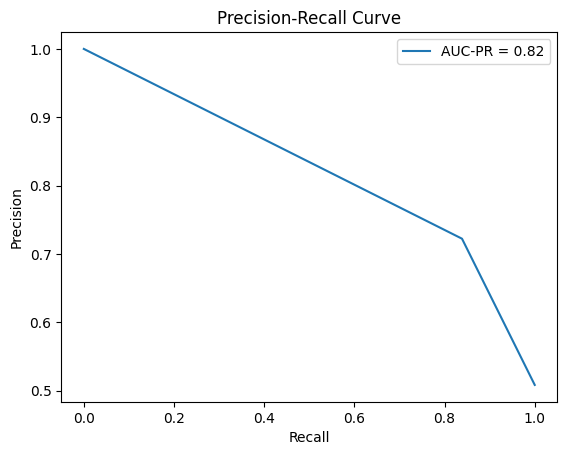

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

def plot_precision_recall_curve(y_test, y_pred3):
    precision, recall, _ = precision_recall_curve(y_test, y_pred3)
    pr_auc = auc(recall, precision)  # Calculate AUC-PR
    plt.plot(recall, precision, label=f'AUC-PR = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')  # Add legend with AUC-PR value
    plt.show()

plot_precision_recall_curve(y_test, y_pred3)

## *Model 4: Naive Bayes Classifier*

In [52]:
from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB() # get instance of model
model4.fit(x_train, y_train) # Train/Fit model 

y_pred4 = model4.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred4)) # output accuracy

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



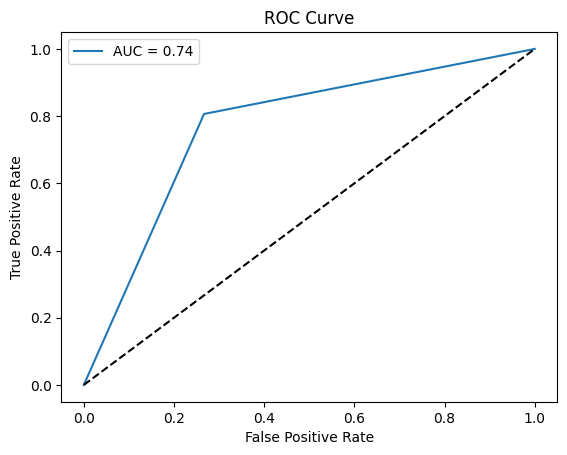

In [53]:
def plot_roc_curve(y_test, y_pred4):
    fpr, tpr, _ = roc_curve(y_test, y_pred4)
    auc = roc_auc_score(y_test, y_pred1)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

plot_roc_curve(y_test, y_pred4)

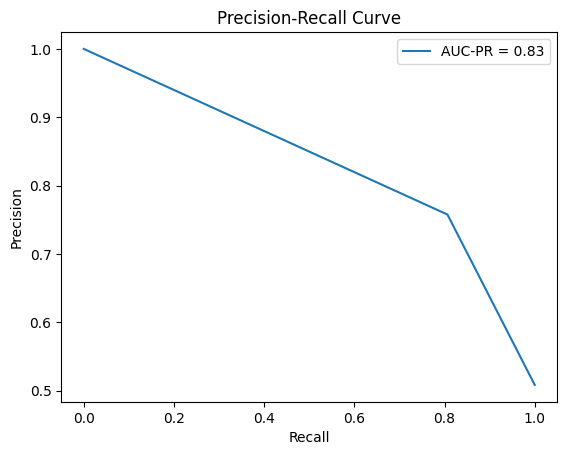

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

def plot_precision_recall_curve(y_test, y_pred4):
    precision, recall, _ = precision_recall_curve(y_test, y_pred4)
    pr_auc = auc(recall, precision)  # Calculate AUC-PR
    plt.plot(recall, precision, label=f'AUC-PR = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')  # Add legend with AUC-PR value
    plt.show()

plot_precision_recall_curve(y_test, y_pred4)


## *Model 5: Decision Trees*

In [55]:
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(random_state=1) # get instance of model
model5.fit(x_train, y_train) # Train/Fit model 

y_pred5 = model5.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred5)) # output accuracy

              precision    recall  f1-score   support

           0       0.68      0.70      0.69        30
           1       0.70      0.68      0.69        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



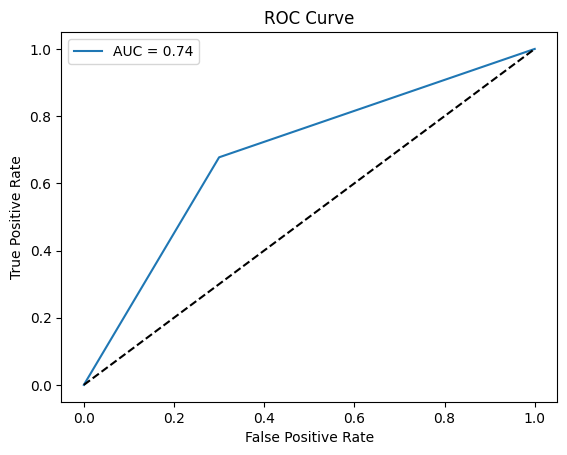

In [56]:
def plot_roc_curve(y_test, y_pred5):
    fpr, tpr, _ = roc_curve(y_test, y_pred5)
    auc = roc_auc_score(y_test, y_pred1)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

plot_roc_curve(y_test, y_pred5)

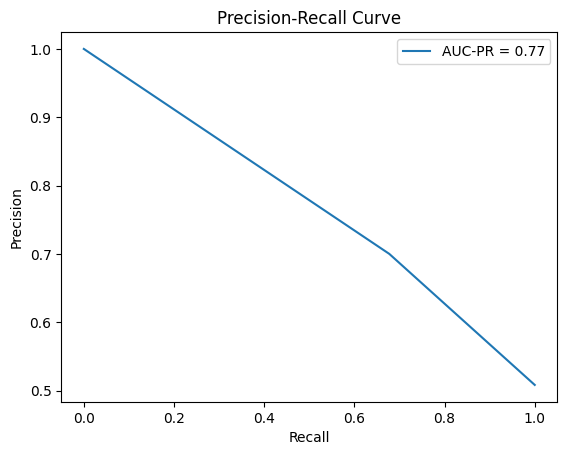

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

def plot_precision_recall_curve(y_test, y_pred5):
    precision, recall, _ = precision_recall_curve(y_test, y_pred5)
    pr_auc = auc(recall, precision)  # Calculate AUC-PR
    plt.plot(recall, precision, label=f'AUC-PR = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')  # Add legend with AUC-PR value
    plt.show()

plot_precision_recall_curve(y_test, y_pred5)

## *Model 6: Random Forest*

In [58]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



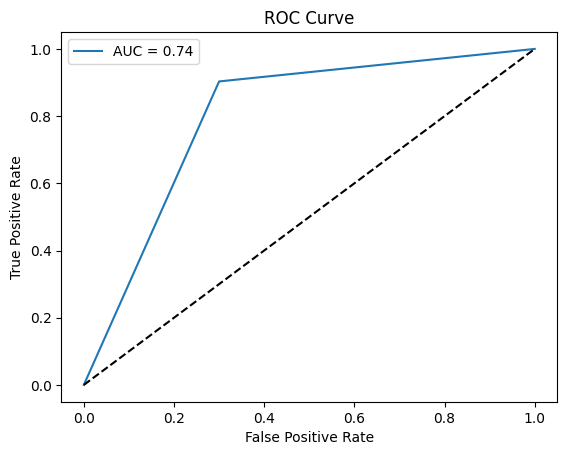

In [59]:
def plot_roc_curve(y_test, y_pred6):
    fpr, tpr, _ = roc_curve(y_test, y_pred6)
    auc = roc_auc_score(y_test, y_pred1)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

plot_roc_curve(y_test, y_pred6)

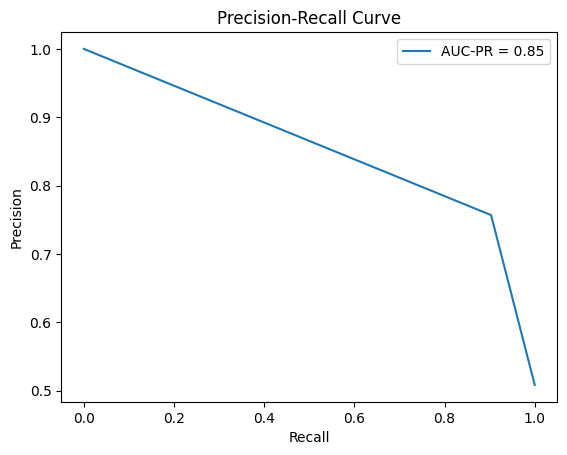

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

def plot_precision_recall_curve(y_test, y_pred6):
    precision, recall, _ = precision_recall_curve(y_test, y_pred6)
    pr_auc = auc(recall, precision)  # Calculate AUC-PR
    plt.plot(recall, precision, label=f'AUC-PR = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.show()

plot_precision_recall_curve(y_test, y_pred6)


## *Model 7: XG Boost*

In [61]:
from xgboost import XGBClassifier

model7 = XGBClassifier(random_state=1)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72        30
           1       0.73      0.77      0.75        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



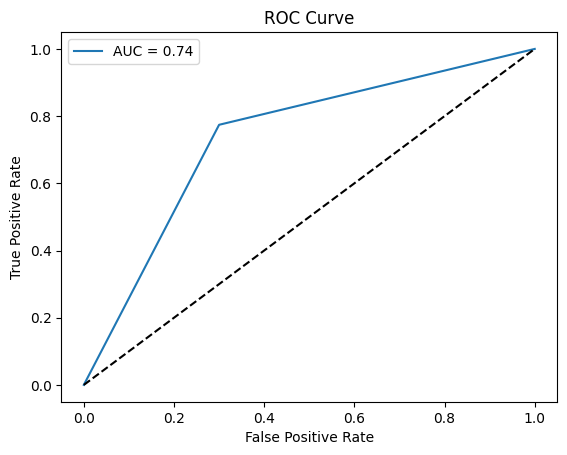

In [62]:
def plot_roc_curve(y_test, y_pred7):
    fpr, tpr, _ = roc_curve(y_test, y_pred7)
    auc = roc_auc_score(y_test, y_pred1)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

plot_roc_curve(y_test, y_pred7)

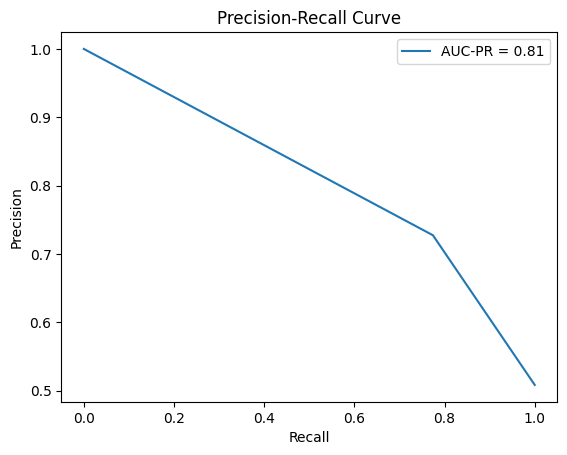

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

def plot_precision_recall_curve(y_test, y_pred7):
    precision, recall, _ = precision_recall_curve(y_test, y_pred7)
    pr_auc = auc(recall, precision)  # Calculate AUC-PR
    plt.plot(recall, precision, label=f'AUC-PR = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')  # Add legend with AUC-PR value
    plt.show()

plot_precision_recall_curve(y_test, y_pred7)

## *Model 8: Neural Networks*

In [64]:
from keras.models import Sequential
from keras.layers import Dense

In [65]:
model8 = Sequential()
model8.add(Dense(11,activation='relu',input_dim=13))
model8.add(Dense(1,activation='sigmoid'))

model8.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\zeelt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model8.fit(x_train,y_train,epochs=400)

Epoch 1/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5758 - loss: 0.7358  
Epoch 2/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6395 - loss: 0.6569 
Epoch 3/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6391 - loss: 0.6591 
Epoch 4/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6682 - loss: 0.6085 
Epoch 5/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6572 - loss: 0.6156 
Epoch 6/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6127 - loss: 0.6427 
Epoch 7/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6703 - loss: 0.6074 
Epoch 8/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7107 - loss: 0.5589 
Epoch 9/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7425 - loss: 0.5340 
Epoch 10/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7395 - loss: 0.5231 
Epoch 11/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7324 - loss: 0.5285 
Epoch 12/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7237 - lo

In [67]:
y_pred_nn = model8.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [68]:
y_pred_nn.shape

(61, 1)

In [69]:
rounded = [round(x[0]) for x in y_pred_nn]

y_pred_nn = rounded

In [70]:
from sklearn.metrics import accuracy_score

score_nn = round(accuracy_score(y_pred_nn, y_test) * 100, 2)

print("The accuracy score achieved using Neural Network is: " + str(score_nn) + " %")


The accuracy score achieved using Neural Network is: 72.13 %


After comparing 8 models we can observe that Random Forest model yields the highest level of accuracy. 

Precision: ratio of correctly predicted positive observation to the total predicted             positives.

Recall: the ratio of correctly predicted positive observations to all the                    observations in the actual class.

F1 Score: the harmonic mean of precision and recall. A score of 1 indicates perfect            precision and recall. A score of 0 indicates the worst performance.

Based on the Precision, Recall and F1 Score values (0.76,0.90,0.82) being the highest amongst all the models we can conclude that model Random Forest will provide conclusions the most accurate.  


### ***OVERALL ACCURACY COMPARISION BETWEEN ML MODELS***

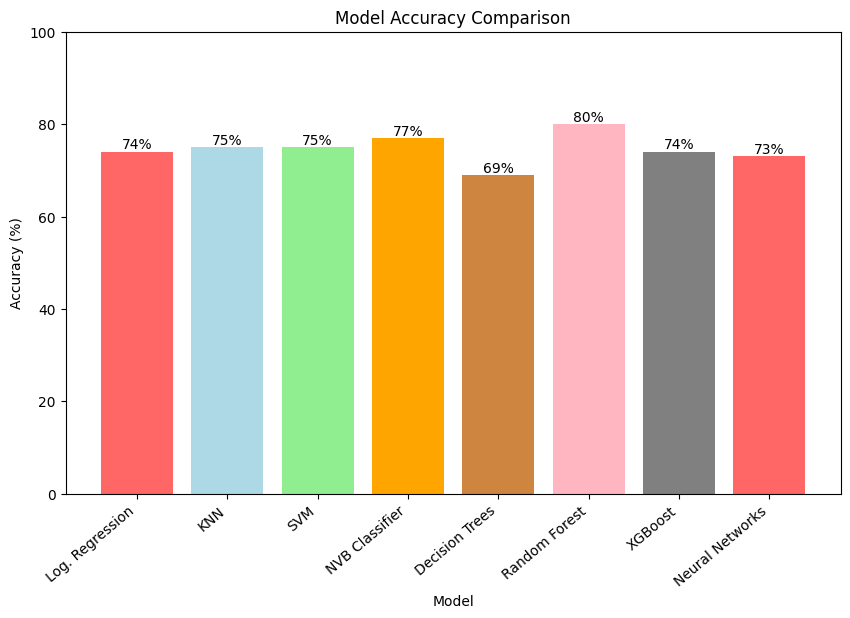

In [71]:
Accuracy_Values = [74,75,75,77,69,80,74,73]
colors = ['#FF6666', 'lightblue', '#90EE90', 'orange', '#CD853F', '#FFB6C1', 'gray']
labels = ['Log. Regression', 'KNN', 'SVM', 'NVB Classifier', 'Decision Trees', 'Random Forest', 'XGBoost', 'Neural Networks']

# Bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, Accuracy_Values, color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=40, ha='right')

for bar, label in zip(bars, Accuracy_Values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{label}%', ha='center', va='bottom')

plt.ylim(0, 100)  # Set y-axis limits for better visualization
plt.show()


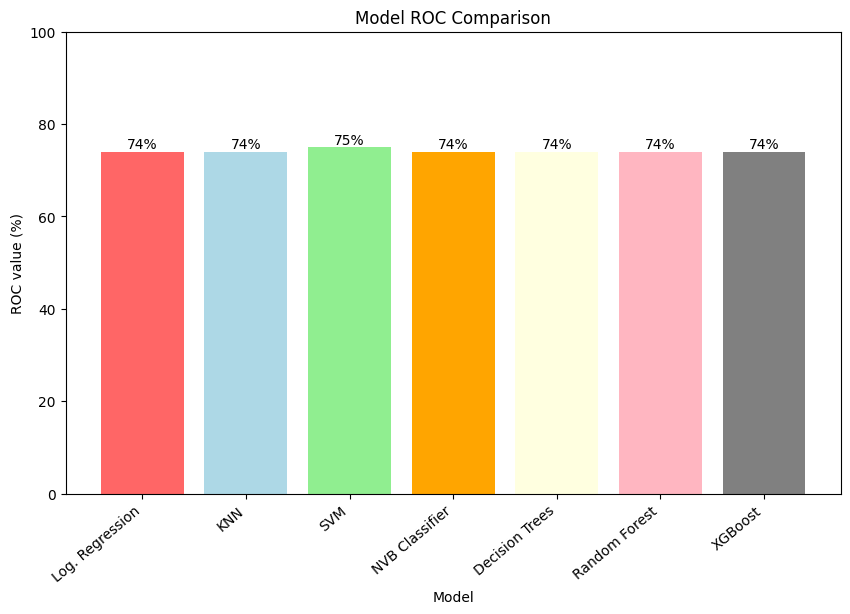

In [72]:
ROC_values = [74,74,75,74,74,74,74]
Precision_Recall_values = [81,82,82,83,77,85,81]
colors = ['#FF6666', 'lightblue', '#90EE90', 'orange', '#FFFFE0', '#FFB6C1', 'gray']
labels = ['Log. Regression', 'KNN', 'SVM', 'NVB Classifier', 'Decision Trees', 'Random Forest', 'XGBoost']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, ROC_values, color=colors)
plt.xlabel('Model')
plt.ylabel('ROC value (%)')
plt.title('Model ROC Comparison')
plt.xticks(rotation=40, ha='right')

for bar, label in zip(bars, ROC_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{label}%', ha='center', va='bottom')

plt.ylim(0, 100)  # Set y-axis limits for better visualization
plt.show()

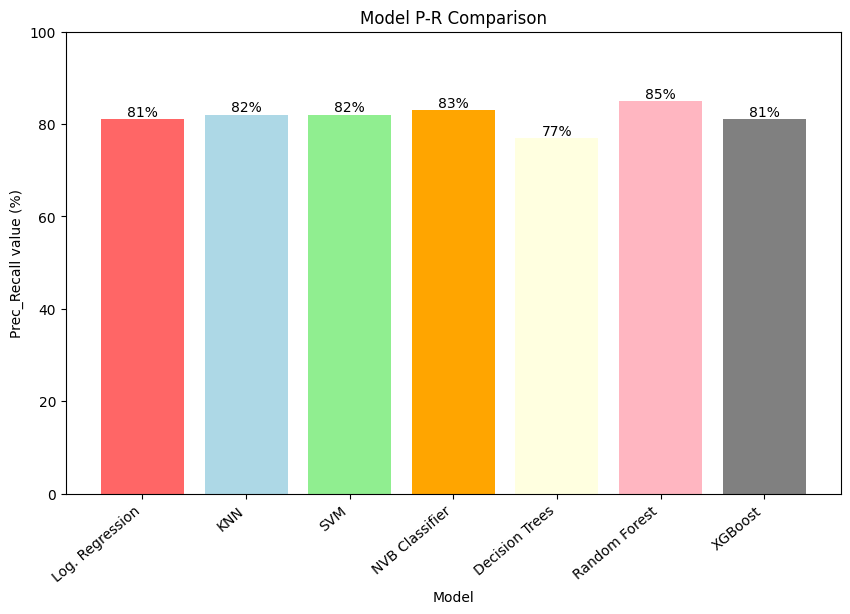

In [73]:
colors = ['#FF6666', 'lightblue', '#90EE90', 'orange', '#FFFFE0', '#FFB6C1', 'gray']
labels = ['Log. Regression', 'KNN', 'SVM', 'NVB Classifier', 'Decision Trees', 'Random Forest', 'XGBoost']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, Precision_Recall_values, color=colors)
plt.xlabel('Model')
plt.ylabel('Prec_Recall value (%)')
plt.title('Model P-R Comparison')
plt.xticks(rotation=40, ha='right')

for bar, label in zip(bars, Precision_Recall_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{label}%', ha='center', va='bottom')

plt.ylim(0, 100)  # Set y-axis limits for better visualization
plt.show()

## ***E. Confusion Matrix***

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred6)
print(cm)
accuracy_score(y_test, y_pred6)

[[21  9]
 [ 3 28]]


0.8032786885245902

Number of True Positive values: 21
Number of True Negative values: 28
Number of False Positive values: 9
Number of False Negative values: 3

accuracy = (TF + TN) / (TP + TN + FP + FN) = (21+28)/(21+28+9+3) = 0.80

A good thumb rule is that any model accruacy above 70% is considered to be good but having an accuracy too high can be a case of overfitting. Thus having an accuracy of 80% is an ideal accuracy. 


## ***F. Importance of Features***

In [75]:
# get importance
importance = model6.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07814
Feature: 1, Score: 0.04206
Feature: 2, Score: 0.16580
Feature: 3, Score: 0.07477
Feature: 4, Score: 0.07587
Feature: 5, Score: 0.00828
Feature: 6, Score: 0.02014
Feature: 7, Score: 0.12772
Feature: 8, Score: 0.06950
Feature: 9, Score: 0.09957
Feature: 10, Score: 0.04677
Feature: 11, Score: 0.11667
Feature: 12, Score: 0.07473


<Axes: >

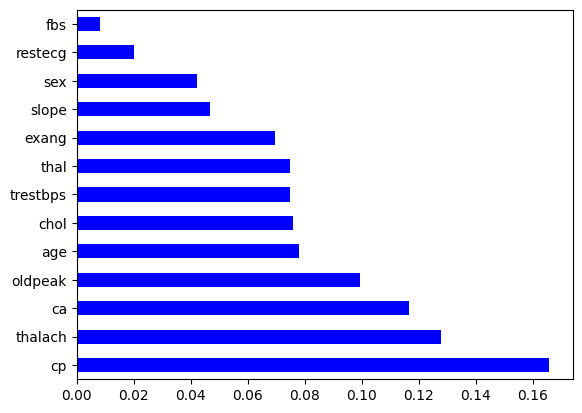

In [76]:
index= data.columns[:-1]
importance = pd.Series(model6.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

Based on the graph above we can conclude that the top 4 significant features that influence the values of prediction are Chest Pain(cp), Maximum heart rate achieved (thalch), number of major vessels(ca) and ST depression induced by exercise relative to rest(oldpeak)

### ***Test Case***

**Scenario**

A 20 year old male,Harshvardhan Shah, has a chest pain value of 2 (atypical angina), and with a resting blood pressure of 110 has serum cholesterol of 230mg/dl. His blood fasting sugar level being greater than 120 mg/dl.

The patient has a maximum heart rate of 140 and the resting electrocardiographic result of 1. The patients ST depression induced by exercise relative to rest was observed as 2.2 and the slope of peak exercise ST segment obtained is flat. 

There are no major vessels by fluoroscopy and his maximum heart rate achieved is a reversable defect.

Now based on the given scenario we will identify whether the patient shows signs of Heart Disease or not.

In [77]:
print(model6.predict(sc.transform([[20,1,2,110,230,1,1,140,1,2.2,2,0,2]])))

[1]


Upon feeding the corresponding attribute values to the Trained Random Forest model, the results obtained are that the patient is a Heart Disease patient. By being able to recognise early whether the patient is a potential Heart Disease patient we may be able to prevent worse symptoms from arising later on. 

## ***Conclusion***

1. Our Random Forest algorithm yields the highest accuracy, 80%. Any accuracy above 70% is considered good, but if your accuracy is extremly high, it may be too good to be true (an example of Overfitting). Thus, 80% is the ideal accuracy!

2. Out of the 13 features we examined, the top 4 significant features that helped us classify between a positive & negative Diagnosis were chest pain type (cp), maximum heart rate achieved (thalach), number of major vessels (ca), and ST depression induced by exercise relative to rest (oldpeak). 

3. Our machine learning algorithm can now classify patients with Heart Disease. Now we can properly diagnose patients, & get them the help they needs to recover. By diagnosing detecting these features early, we may prevent worse symtoms from arising later.

## ***RANDOM FOREST MODEL FOR WEBPAGE***

In [108]:
target = data['target']
features = data.drop(['target'], axis = 1)

In [109]:
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [110]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

In [111]:
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of classification report
    """
    results = {}
    
    # Train the model
    model.fit(train_features, y_train)
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results

In [112]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the models
rf = RandomForestClassifier(random_state = 1)

# Fit and evaluate models
results = {}
for cls in [rf]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, x_train, y_train, x_test, y_test)
    

In [113]:
# Print classifiers results
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----')
    print()

RandomForestClassifier

classification_report :
              precision    recall  f1-score   support

           0       0.50      0.59      0.54        27
           1       0.62      0.53      0.57        34

    accuracy                           0.56        61
   macro avg       0.56      0.56      0.56        61
weighted avg       0.57      0.56      0.56        61


confusion_matrix :
[[16 11]
 [16 18]]

-----



In [114]:
import pickle 

with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)